# Exploratory Data Analysis

## Required Packages and Libraries

To properly reproduce these visualizations you will need to use the following packages and libraries:

In [1]:
import pandas as pd               #Used for data manipulation, tidying data and conditional statements
import matplotlib.pyplot as plt   #Data visualization dictionary
import numpy as np  

## Data Prep & Cleaning

Since our focus is on how campaigns affected sales the following data frames were imported into Python:

In [2]:
from completejourney_py import get_data

cj_data = get_data()
transactions = cj_data['transactions']
demographics = cj_data['demographics']
products = cj_data['products']
campaigns = cj_data['campaigns']

Once the completejourney data was imported into Python, the next step was to tidy the data. We were interested in discovering trends related to campaigns and how it affected sales. Therefore, we started with merging campaigns, demographics, transactions and products. 

In [3]:
# merge campaigns, demographics, transactions on household_id
df1 = (
    campaigns
    .merge(demographics, how='inner', on='household_id')
    .merge(transactions, how='inner', on='household_id')
)

# merge coupon_redmptions with domepgraphics on household_id and campaign_descriptions on campaign_id
coupons = (
    cj_data['coupon_redemptions']
    .merge(cj_data['demographics'], how='inner', on='household_id')
    .merge(cj_data['campaign_descriptions'], how='inner', on='campaign_id')
)

# merge coupon_redemptions with coupons on campaign_id
coupon_transactions = (
    cj_data['coupon_redemptions']
    .merge(cj_data['coupons'], how='inner', on='campaign_id')
)

In [4]:
datetimes = pd.to_datetime(coupon_transactions['redemption_date'])
coupon_transactions['day'] = datetimes.dt.day
coupon_transactions['month'] = datetimes.dt.month
coupon_transactions['year'] = datetimes.dt.year

coupon_redemptions = (
coupon_transactions
    .groupby('month')['redemption_date'].count()
)
coupon_redemptions = coupon_redemptions.to_frame()

## Visualizations

### Which campaigns sold the most products?

The first step we took to evaluate the effectiveness of campaigns was to find out the total sales achieved through each campaign.

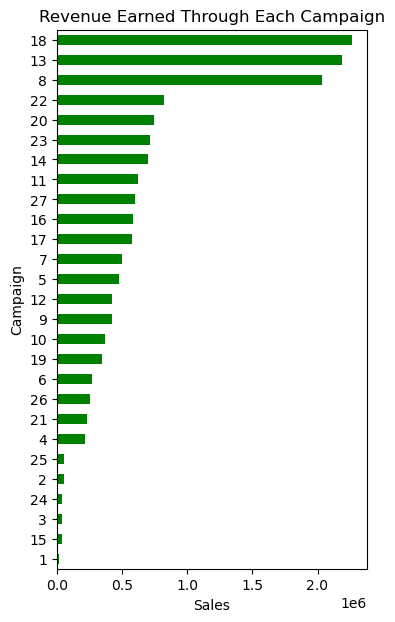

In [5]:
df_campaigns = df1.groupby(['campaign_id'],as_index=False).agg({'sales_value':'sum'}).sort_values(by = 'sales_value', ascending=False)

ax =(df_campaigns
    .sort_values('sales_value')
    .plot(x='campaign_id', y='sales_value', kind='barh', title='Revenue Earned Through Each Campaign', figsize=(4,7),color='green', legend = False, xlabel='Campaign')
);
ax.set_xlabel('Sales');

Looking at the bar chart above it is clear that campaigns 18, 13 and 8 generated the highest sales. Let's take a deeper dive into these three campaigns.

### Coupon Redemptions Over Time

We can now look at what times of the year coupons are most used.

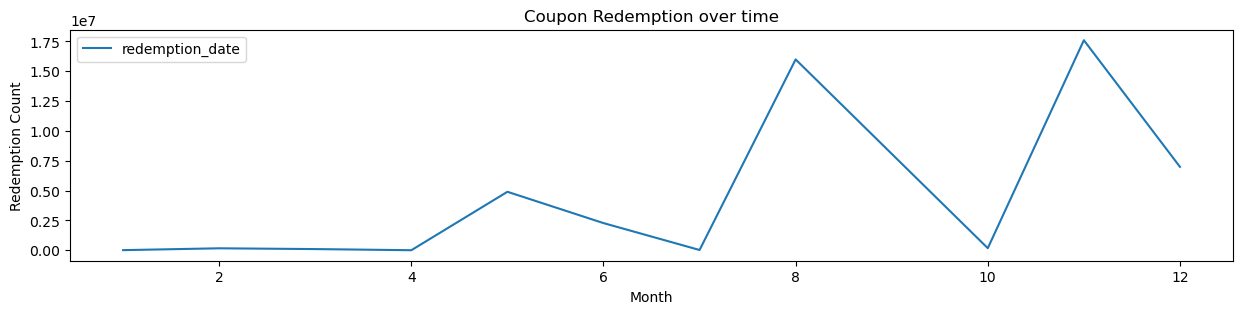

In [6]:
coupon_redemptions.plot(
    kind='line',
    title='Coupon Redemption over time',
    ylabel='Redemption Count',
    xlabel='Month',
    figsize=(15,3)
);

From the above plot, it is clear that coupon redemptions are highest during the months of August and November. This may be due to the increase in purchases during back to school and the holiday seasons. Therefore, Regork may benefit from increasing coupons and campaigns during this time of the year.

### Coupon Redemptions by Age Group

Now that we can see which campaigns are most effective, we can look at what customers are most valuable to target these campaigns towards.

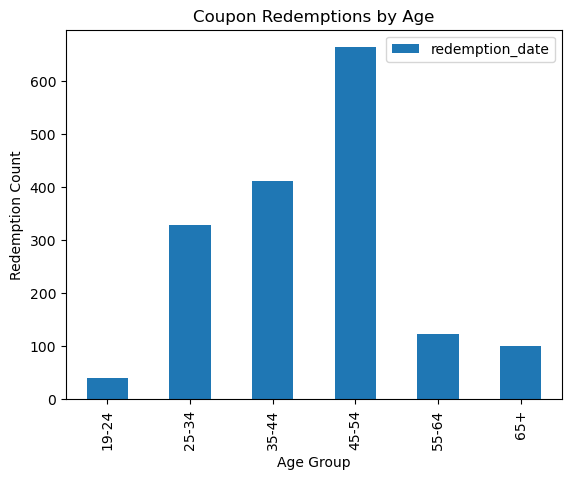

In [7]:
redemptions = (
coupons
    .groupby('age')['redemption_date'].count()
)
redemptions = redemptions.to_frame()
redemptions.plot(
    kind='bar',
    title='Coupon Redemptions by Age',
    ylabel='Redemption Count',
    xlabel='Age Group',
);

From the above plot, it is clear that coupon redemptions are mostly used by people within the age category of 45-54. Regork should prioritize this age group when sending out coupons promoting products.

### Sales Value by Demographic

In this section we wanted to determine how the average sales value varied across the different demographics.

In [8]:
married_value = (
    df1
    .groupby(['marital_status'],as_index=False)
    .agg({'sales_value': 'mean'})
)
married_value

,marital_status,sales_value
0,Married,3.286185
1,Unmarried,3.077016


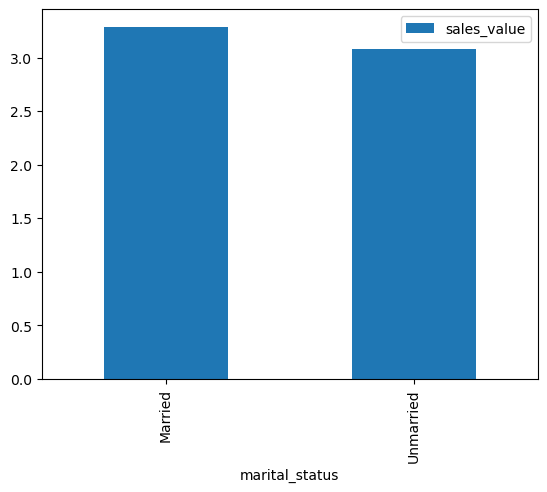

In [9]:
married_value.plot.bar(x='marital_status', y='sales_value');

Average sales made between married and unmarried people remain quite similar with married people having a slightly higher sales value.

In [10]:
salary_value = (
    df1
    .groupby(['income'],as_index=False)
    .agg({'sales_value': 'mean'})
    .sort_values('sales_value')
)
salary_value

,income,sales_value
2,15-24K,2.910096
6,25-34K,2.983829
8,35-49K,2.992532
11,Under 15K,2.996083
9,50-74K,3.163346
10,75-99K,3.395323
1,125-149K,3.432552
3,150-174K,3.451712
0,100-124K,3.520661
7,250K+,3.707235


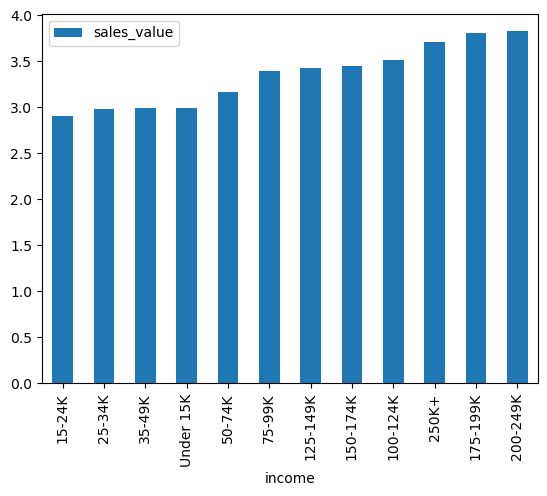

In [11]:
salary_value.plot.bar(x='income', y='sales_value');

Regork may benefit from sending more coupons to homes with lower incomes to increase spending power within those homes.

In [12]:
homeowner_value = (
    df1
    .groupby(['home_ownership'],as_index=False)
    .agg({'sales_value':'mean'})
)
homeowner_value

,home_ownership,sales_value
0,Homeowner,3.306641
1,Probable Homeowner,2.739900
2,Probable Renter,2.850118
3,Renter,2.985395


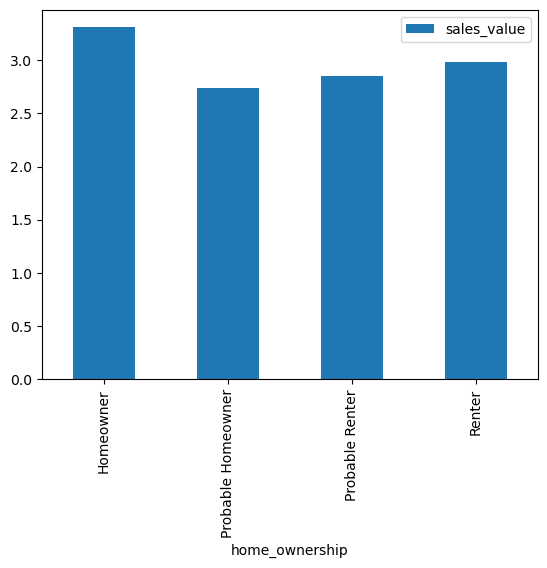

In [13]:
homeowner_value.plot.bar(x='home_ownership', y='sales_value');

Homeowners should be prioritized during promotional campaigns as they have the highest average sales values followed by renters.

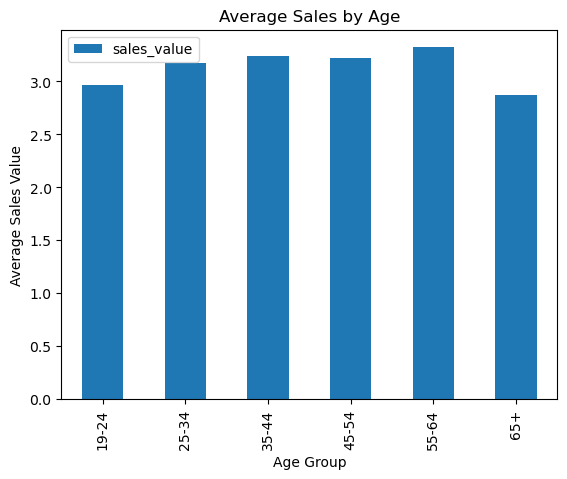

In [14]:
age_group = (
df1
    .groupby(['age'])
    .agg({'sales_value': 'mean'})
)
age_group.plot(
    kind='bar',
    title='Average Sales by Age',
    ylabel='Average Sales Value',
    xlabel='Age Group',
);

When considering the average sales made by each group, people within the ages of 35-64 spend more money. Therefore, it would be beneficial for Regork to prioritize these age groups during promotional campaigns and coupon distributions.

# Environment

In [15]:
%load_ext watermark
%watermark -v -p jupyterlab

Python implementation: CPython
Python version       : 3.9.13
IPython version      : 7.31.1

jupyterlab: 3.4.4

